In [ ]:
!pip install corner pymc >/dev/null

import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

import corner
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Running on PyMC v4.1.4


In [ ]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [ ]:
# True values
a1, a2 = 1.0, 0.5
noised = .4


size = 10

# First variable
x = np.random.randn(size)

n = rng.normal(size=size) * noised

err2 = np.ones(size) * noised

err3 = rng.normal(size=size) * noised

# Simulate outcome variable
y = a1 * x + a2 + n



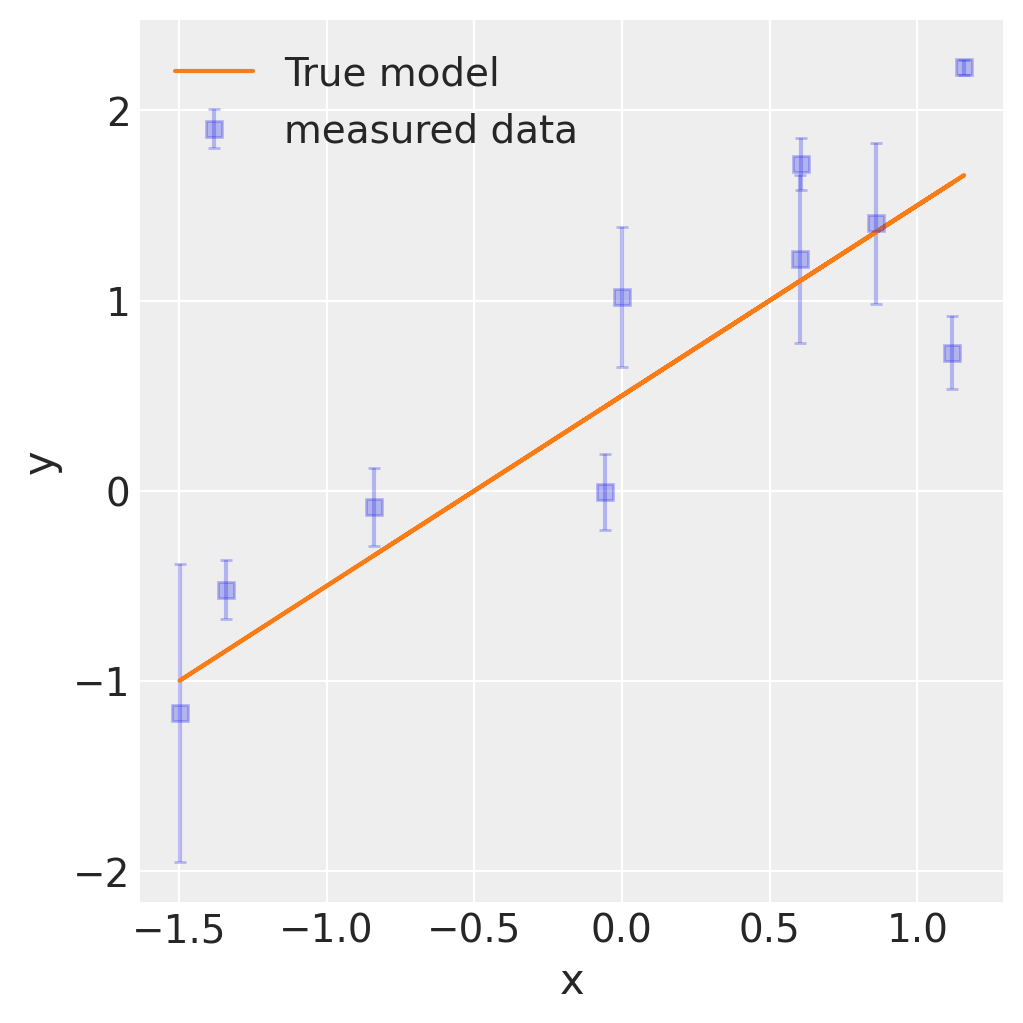

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.errorbar(x, y, yerr=err3, alpha=0.3, fmt='s', capsize=2, label="measured data")
axes.plot(x, a1*x + a2, label="True model")
axes.set_ylabel("y")
axes.set_xlabel("x")
#axes.set_aspect('equal');
axes.legend();
#axes[1].set_xlabel("X2");

In [ ]:
model1 = pm.Model()

with model1:
    b1 = pm.Normal("b1", mu=1.0, sigma=5.0)
    b2 = pm.Normal("b2", mu=0.5, sigma=3.0)

    #sig = pm.Normal("sig", mu=1.0, sigma=2.0)

    m = b1 * x + b2

    y_obs = pm.Normal("y_obs", mu=m, sigma=err2, observed=y)



In [ ]:
with model1:
    idata = pm.sample(draws=10000, chains=4, cores=2)

Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
INFO:pymc:Multiprocess sampling (4 chains in 2 jobs)
NUTS: [b1, b2]
INFO:pymc:NUTS: [b1, b2]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 79 seconds.
INFO:pymc:Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 79 seconds.


In [ ]:
az.summary(idata, round_to=9)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b1,0.968246,0.134844,0.713920,1.224399,0.000656,0.000466,42294.222018,30642.024871,1.000136
b2,0.594181,0.127011,0.360488,0.839813,0.000616,0.000441,42531.276580,30034.911990,1.000246


/usr/local/lib/python3.7/dist-packages/corner/core.py:104: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  left=lb, bottom=lb, right=tr, top=tr, wspace=whspace, hspace=whspace


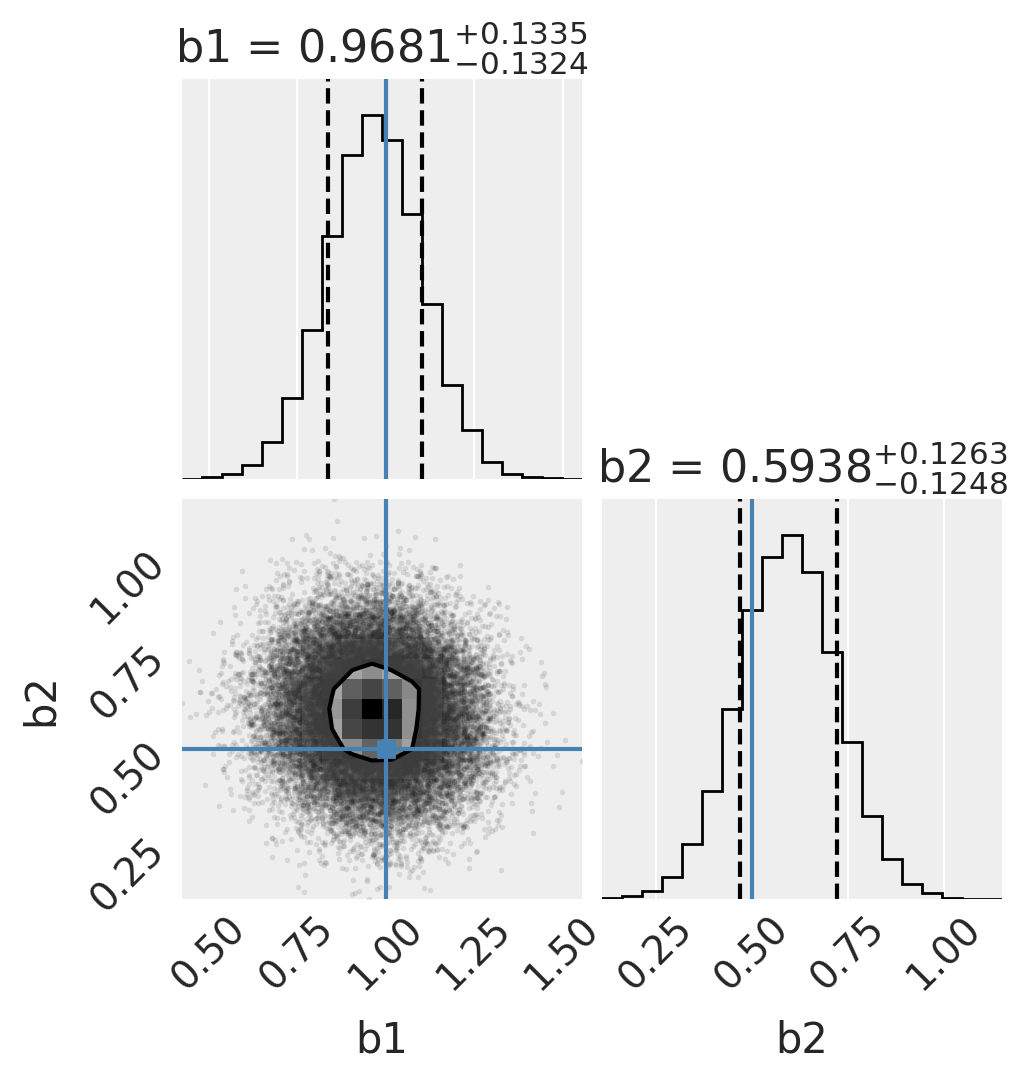

In [ ]:
corner.corner(idata, truths=[1, 0.5], show_titles=True, quantiles=(0.16, 0.84), levels=(1-np.exp(-0.5),), title_fmt='.4f');

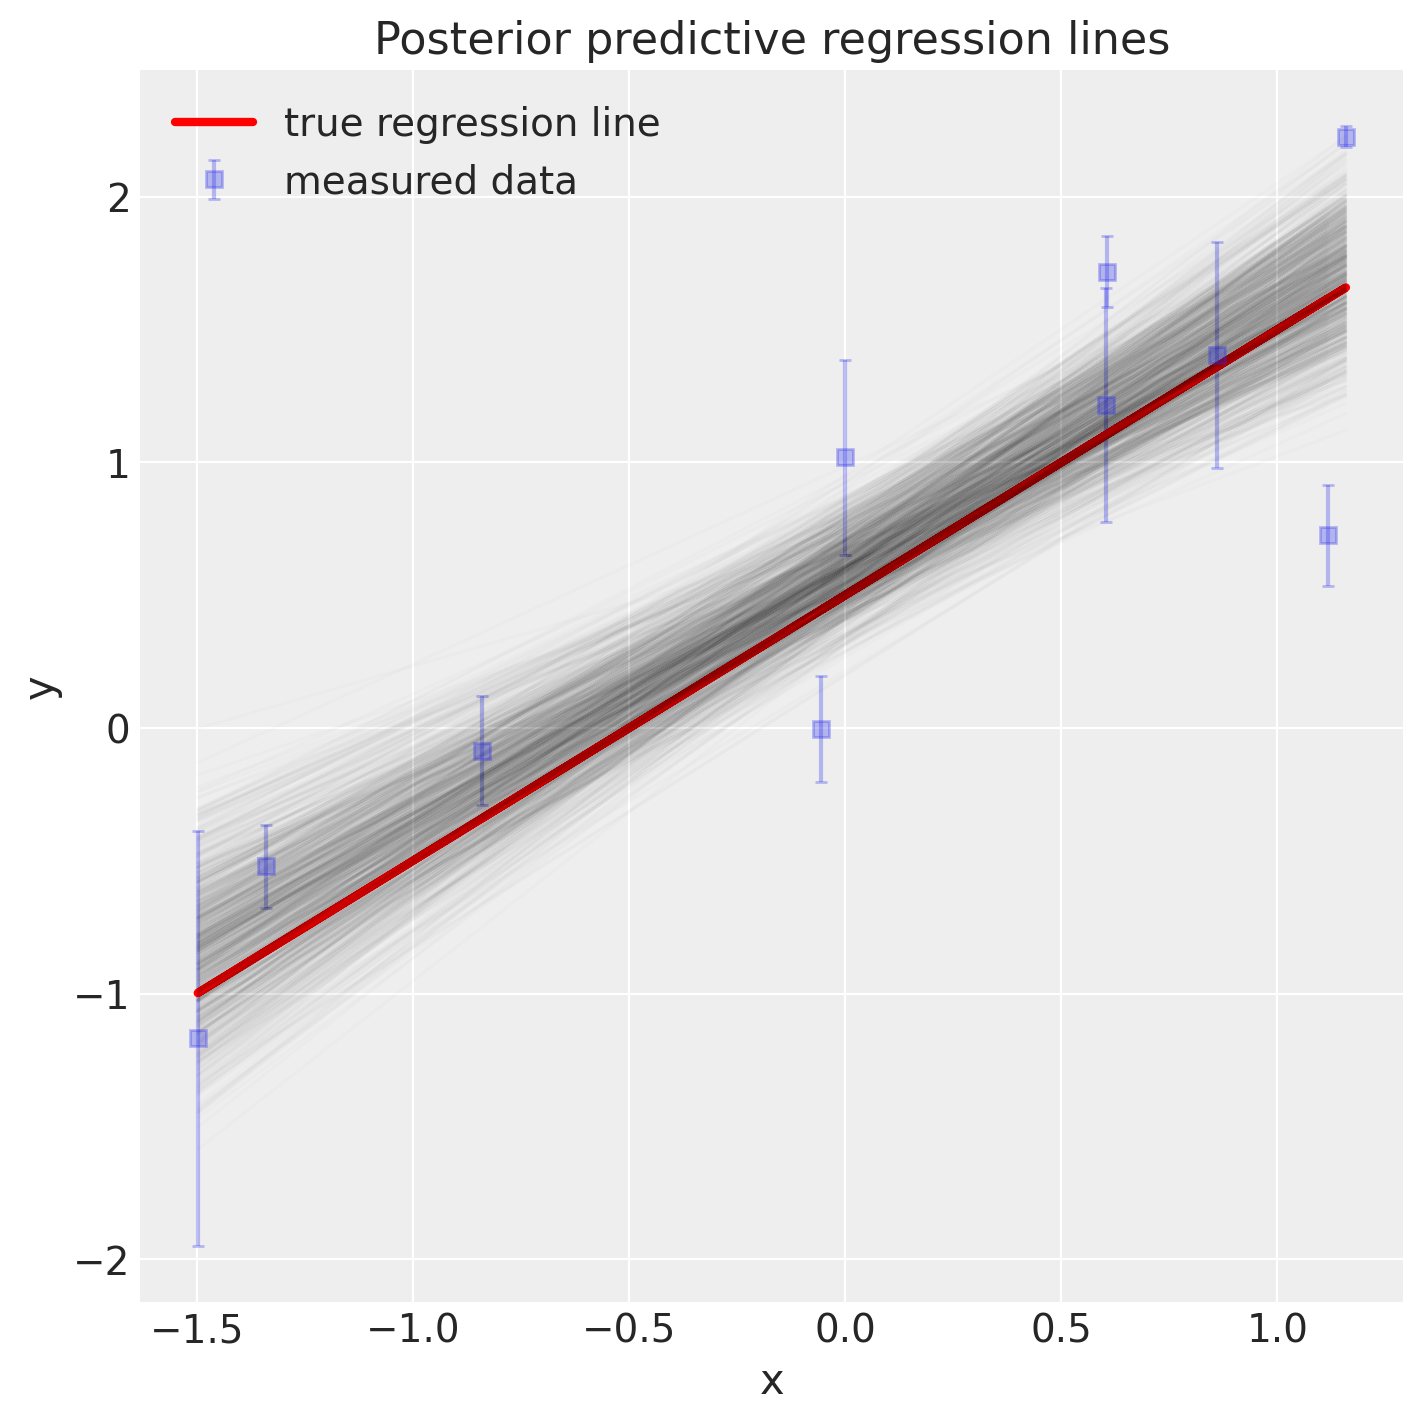

In [ ]:
plt.figure(figsize=(7, 7))
plt.errorbar(x, y, yerr=err3, alpha=0.3, fmt='s', capsize=2, label="measured data")
plt.plot(x, a1 * x + a2, label="true regression line", lw=3.0, c="r")


b11 = np.concatenate(np.array(idata["posterior"]["b1"]))
b22 = np.concatenate(np.array(idata["posterior"]["b2"]))

# Plotting some random fitted lines
for i in range(1, 1001):
    plt.plot(x, b11[-1*i] * x + b22[-1*i], alpha = 0.01, lw=1.0, c='k')

plt.title("Posterior predictive regression lines")
plt.legend()
plt.xlabel("x")
plt.ylabel("y");